In [1]:
## Lab | Cleaning categorical data
## For this lab, we will be using the dataset in the Customer Analysis Business Case. 
## This dataset can be found in files_for_lab folder. In this lab we will explore categorical data. 
## You can also continue working on the same jupyter notebook from the previous lab. However that is not necessary.

## Instructions?
    ## Import the necessary libraries if you are starting a new notebook.
    ## Load the csv. Use the variable customer_df as customer_df = pd.read_csv().
    ## What should we do with the customer_id column?
    ## Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.:
        ##  numerical_df = customer_df.select_dtypes()
        ## categorical_df = customer_df.select_dtypes()
    ## Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis
    ## For the categorical data, check if there is any data cleaning that need to perform. Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

In [2]:
## Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
## Setting 'cusotmer_id' as index for our data
customer_df.set_index('Customer', inplace=True)
customer_df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
customer_df.info()  ## We can confirm that the column "Consumer" was put out

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   Effective To Date              9134 non-null   object 
 6   EmploymentStatus               9134 non-null   object 
 7   Gender                         9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   object 
 10  Marital Status                 9134 non-null   object 
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null

In [6]:
## Load the continuous and discrete variables into numericals_df and categorical_df variables

numerical_df = customer_df.select_dtypes(include=['float64', 'int64'])
categorical_df = customer_df.select_dtypes(include=['object'])


In [7]:
numerical_df.shape


(9134, 8)

In [8]:
categorical_df.shape

(9134, 15)

In [9]:
display(numerical_df)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
LA72316,23405.987980,71941,73,18,89,0,2,198.234764
PK87824,3096.511217,21604,79,14,28,0,1,379.200000
TD14365,8163.890428,0,85,9,37,3,2,790.784983


In [10]:
display(categorical_df)

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize


In [11]:
## Plot every categorical variable. each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis

numerical_target = 'Customer Lifetime Value'

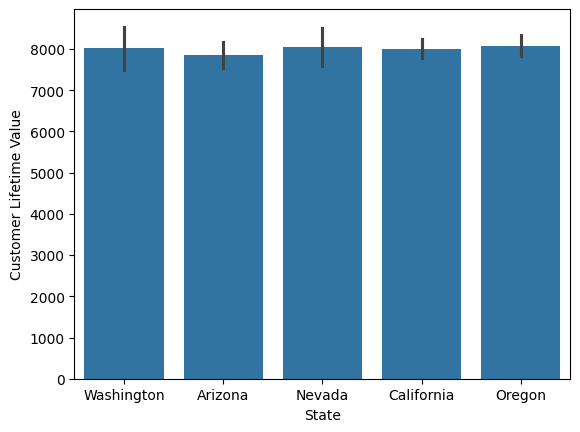

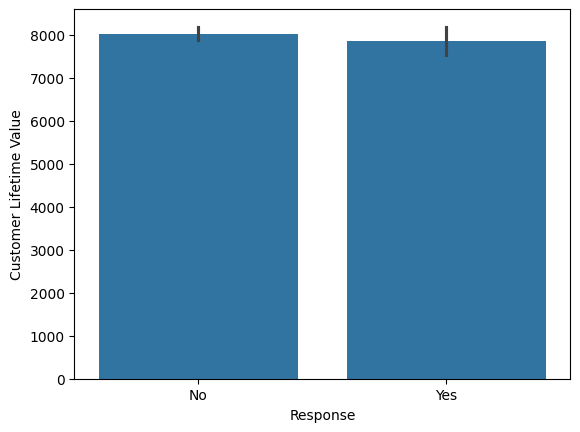

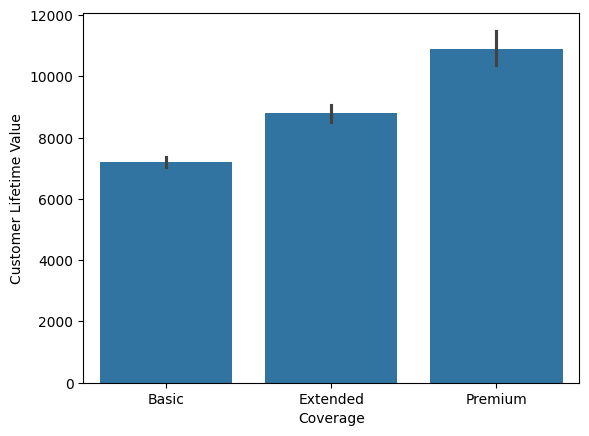

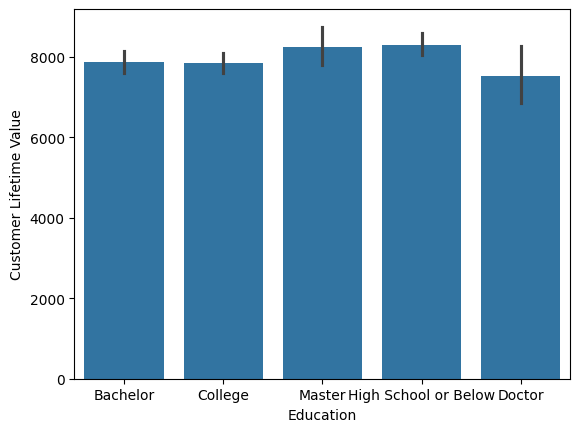

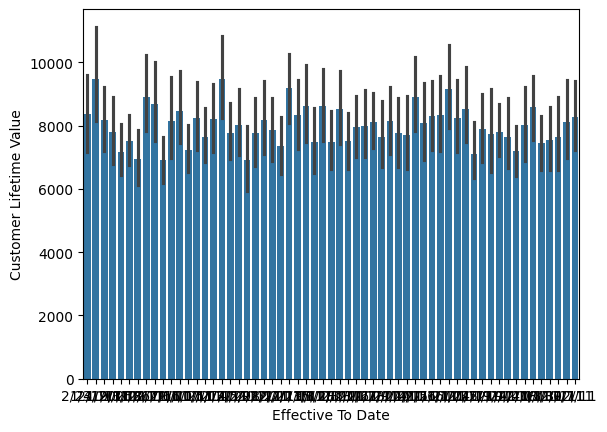

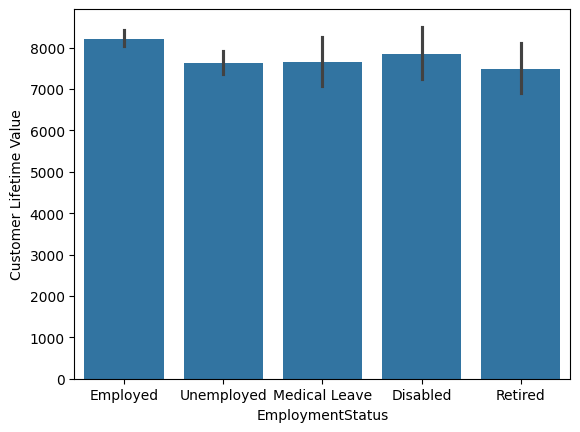

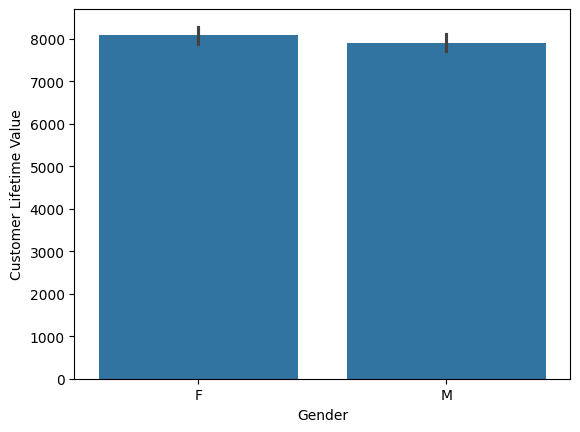

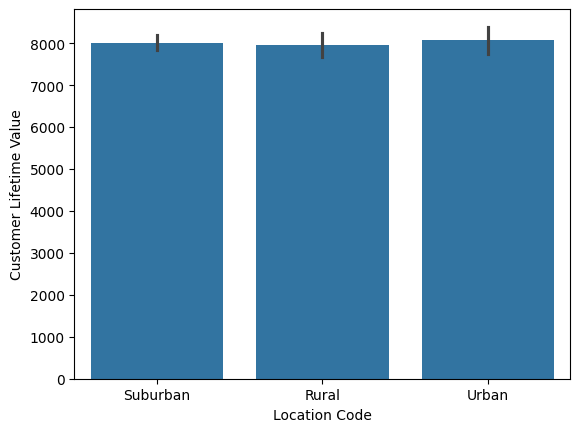

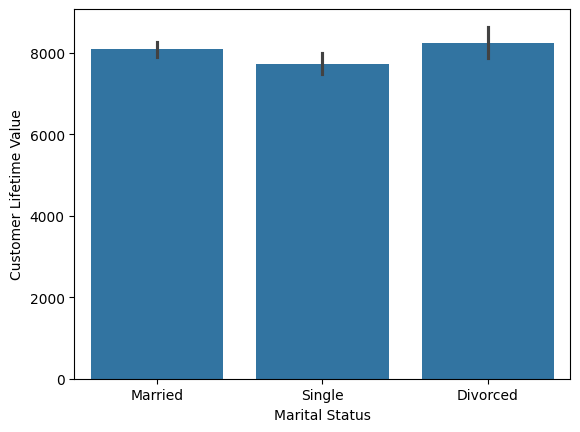

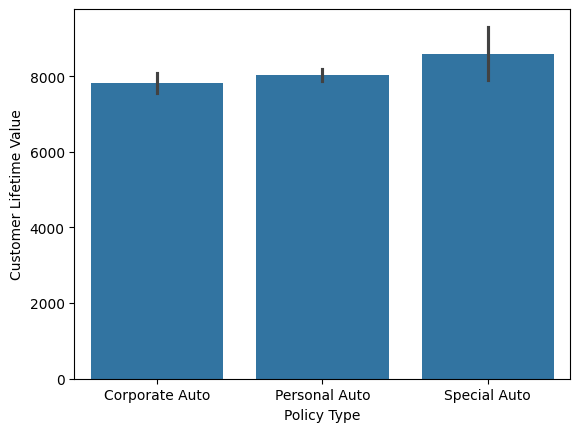

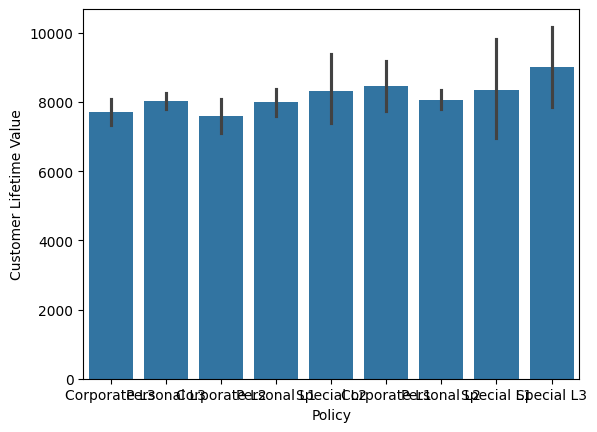

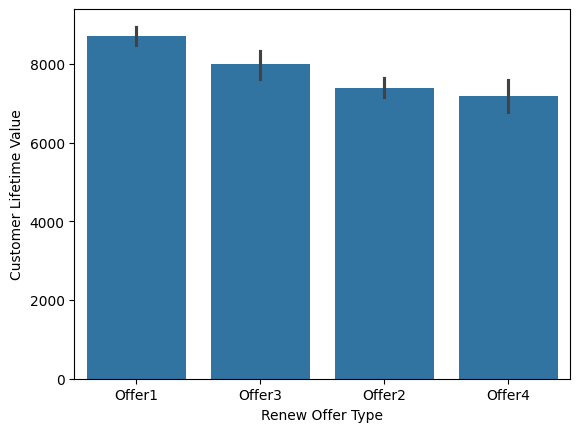

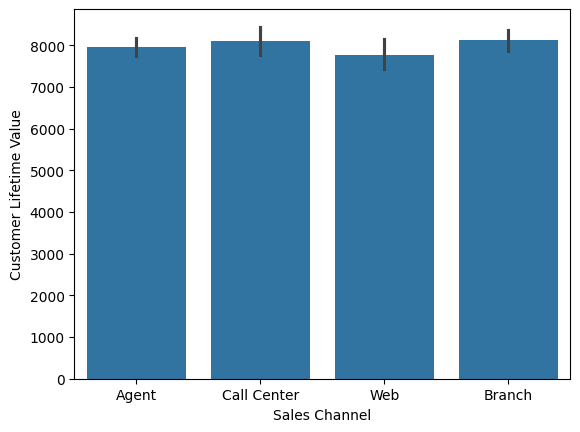

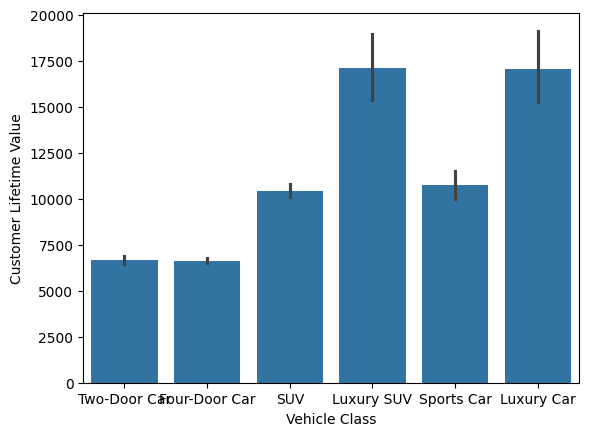

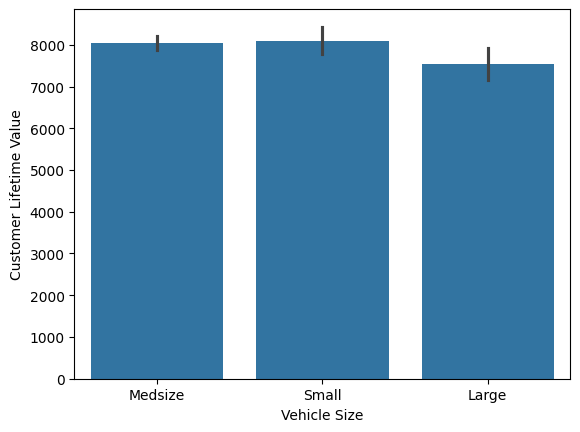

In [12]:
for col in categorical_df:
    sns.barplot(data=customer_df, x=col, y="Customer Lifetime Value")
    plt.show()

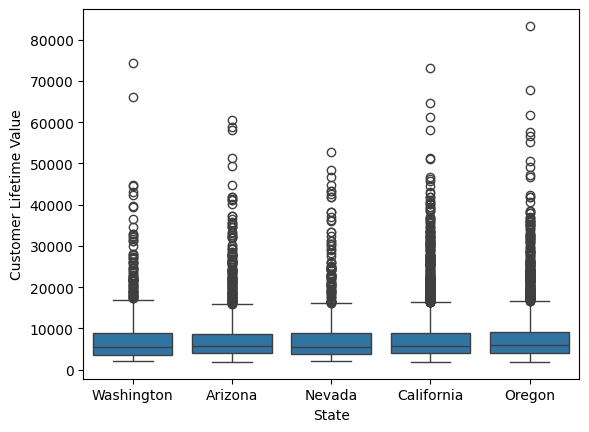

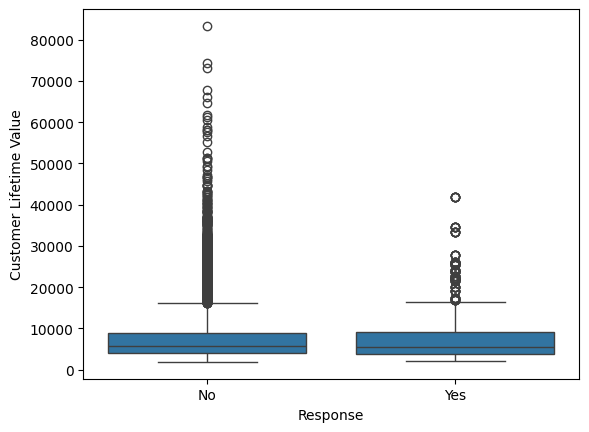

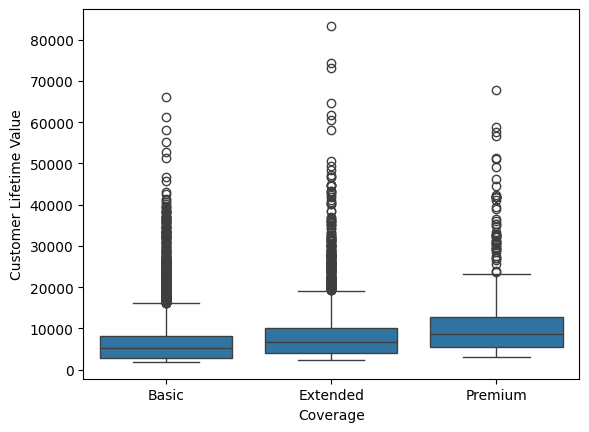

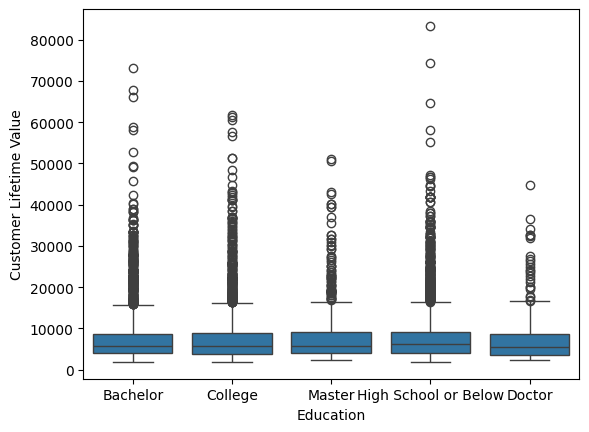

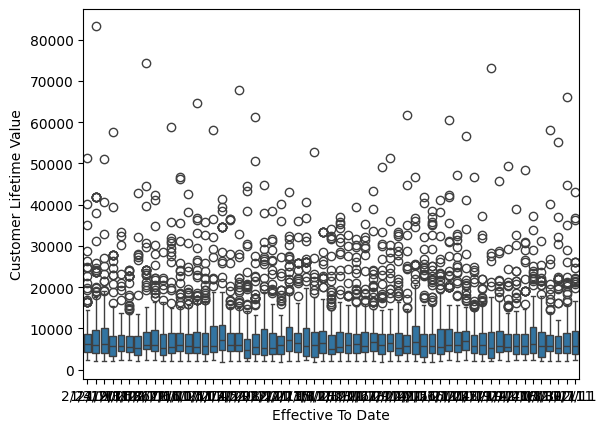

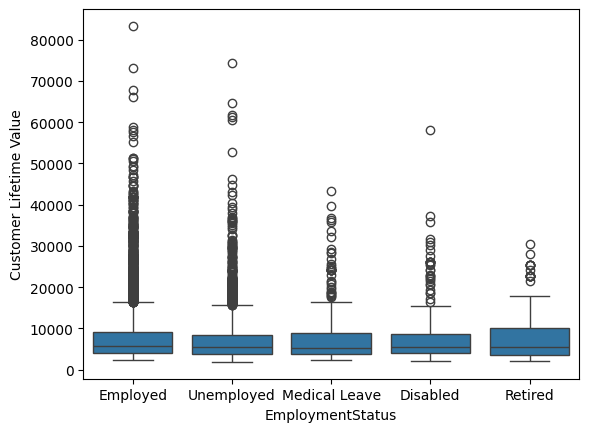

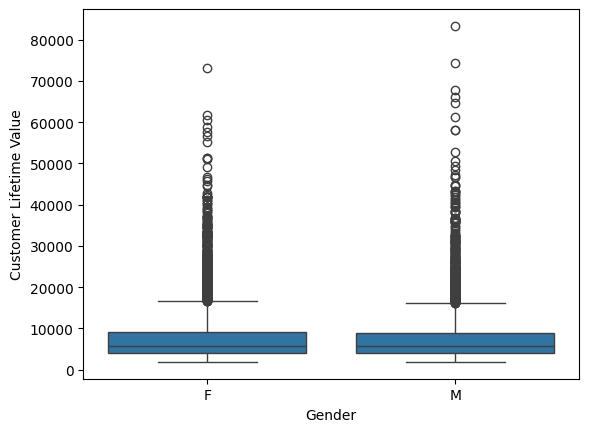

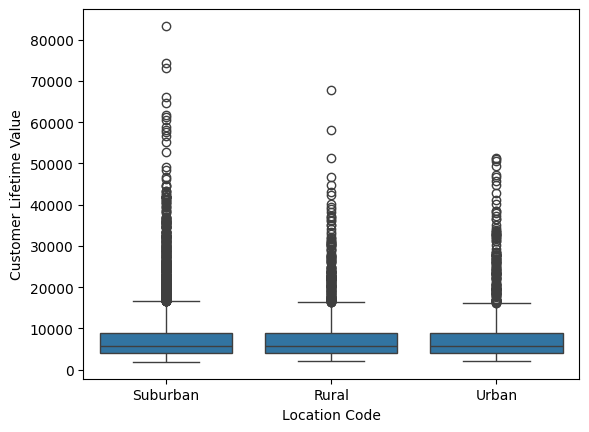

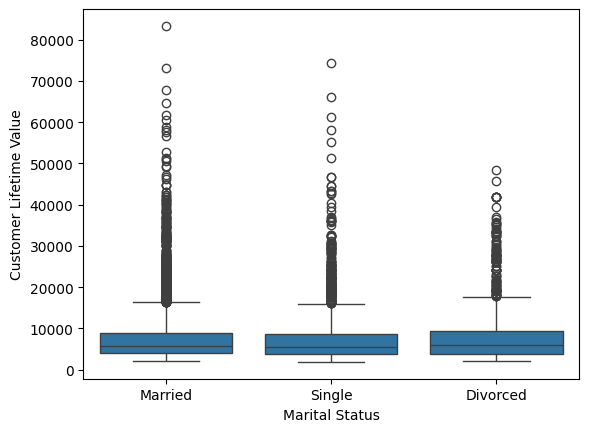

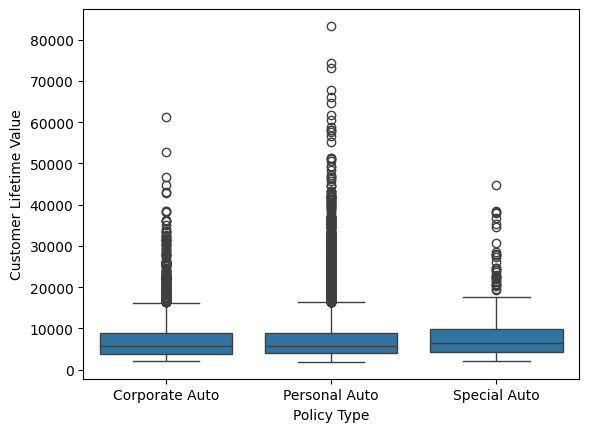

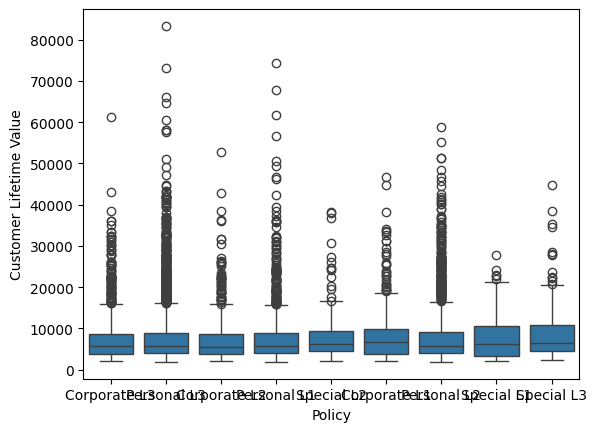

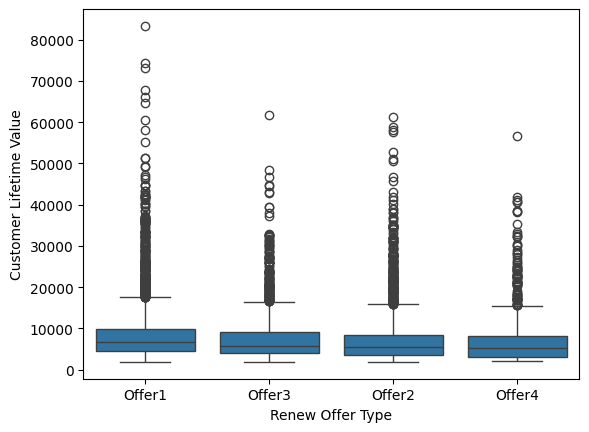

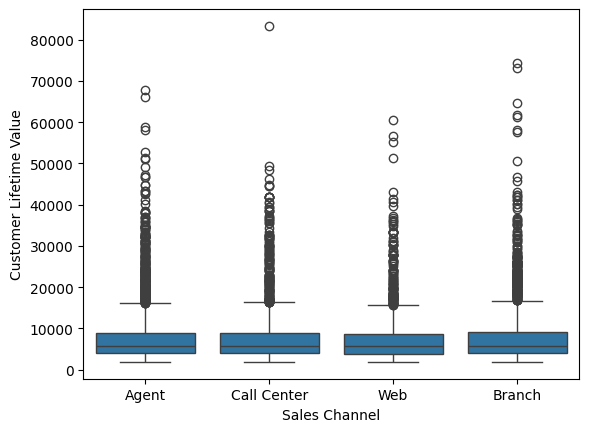

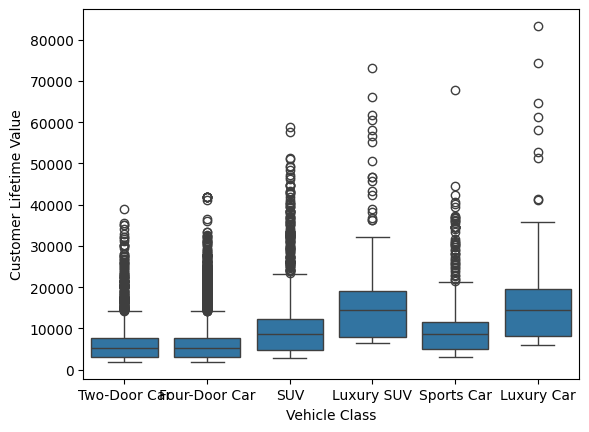

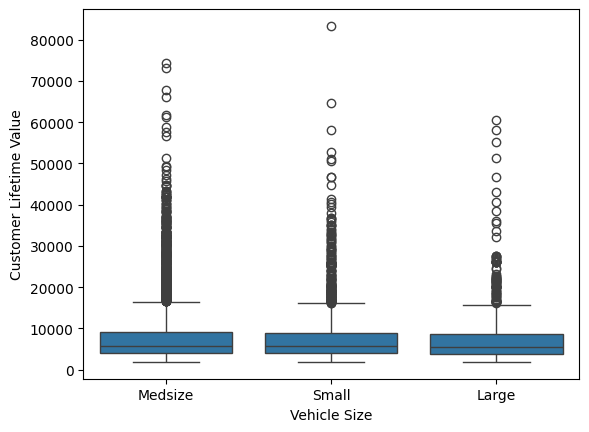

In [13]:
for col in categorical_df:
    sns.boxplot(data=customer_df, x=col, y="Customer Lifetime Value")
    plt.show()

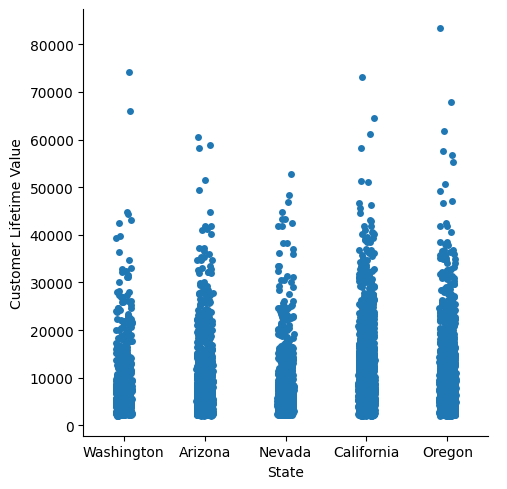

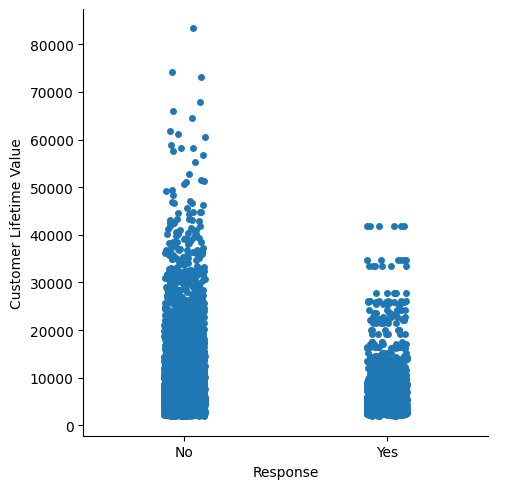

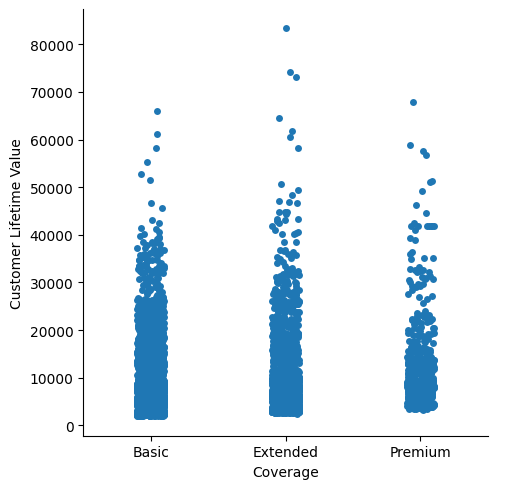

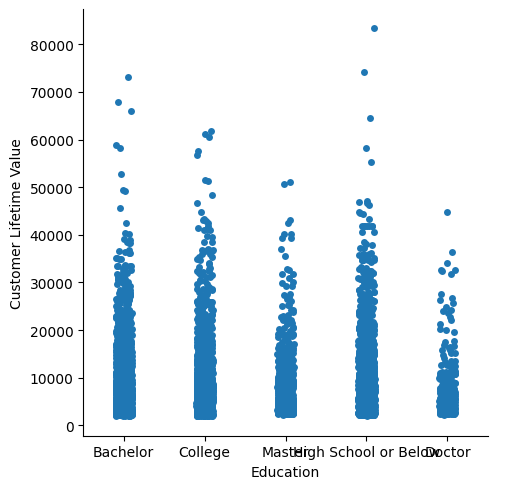

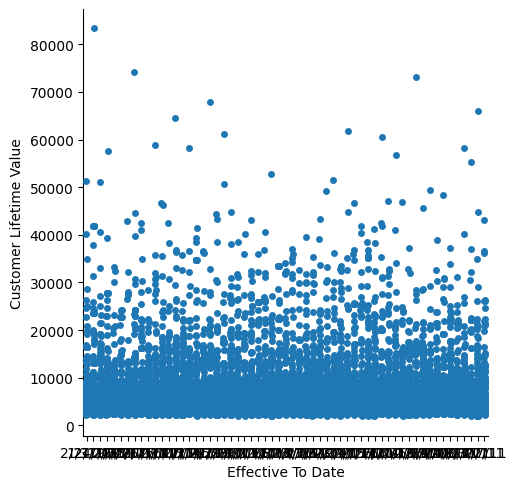

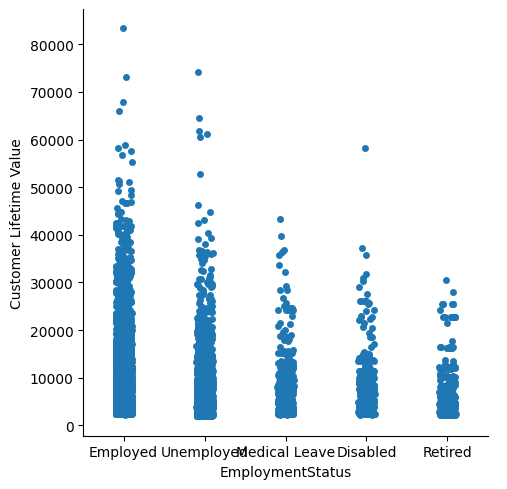

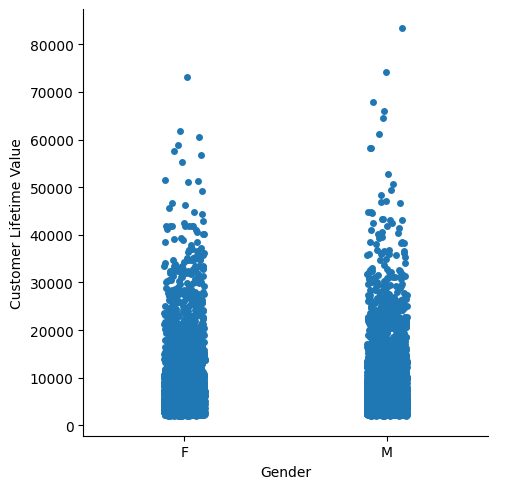

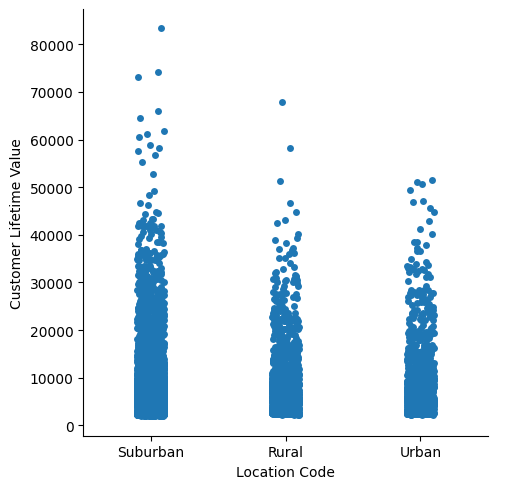

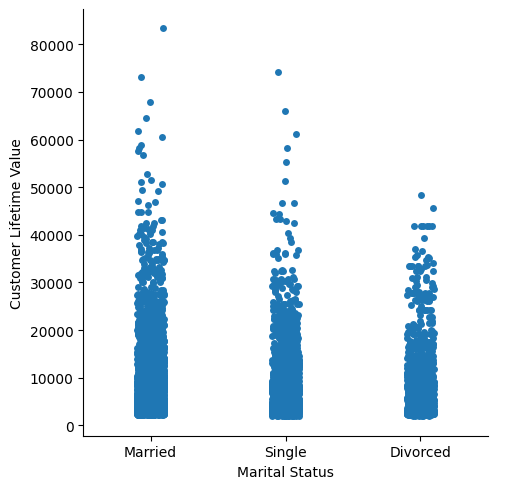

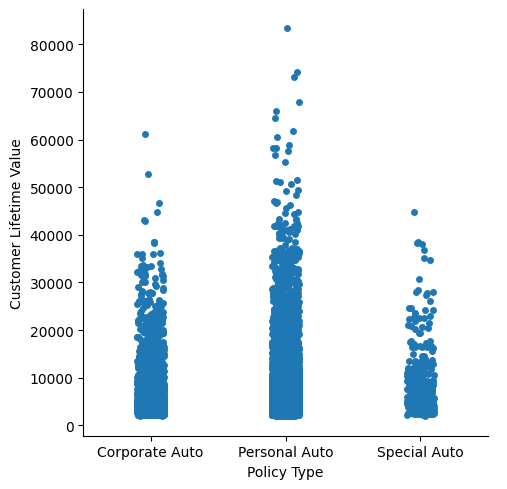

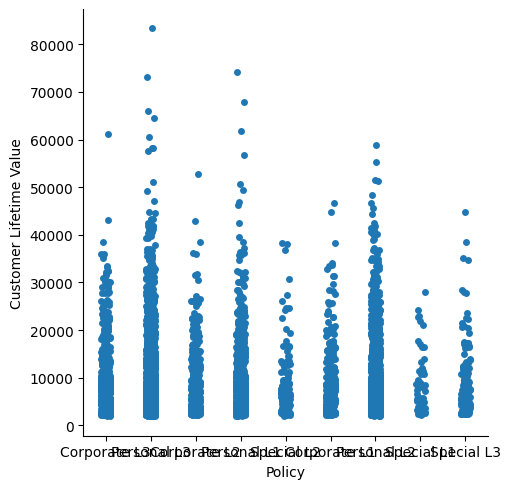

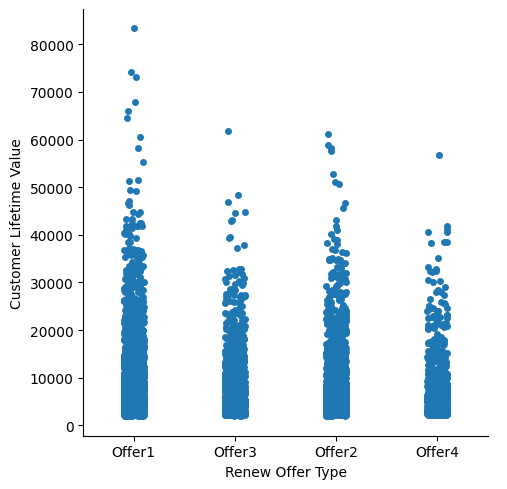

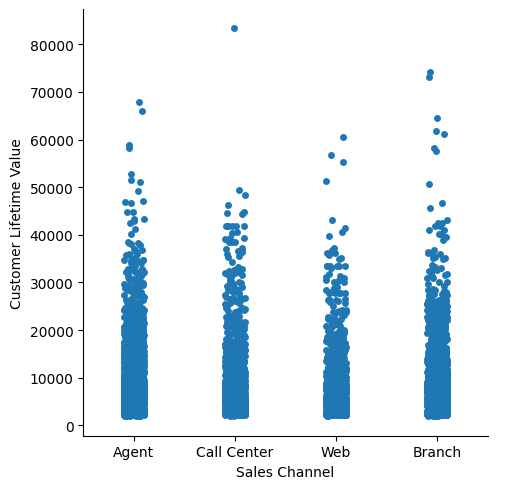

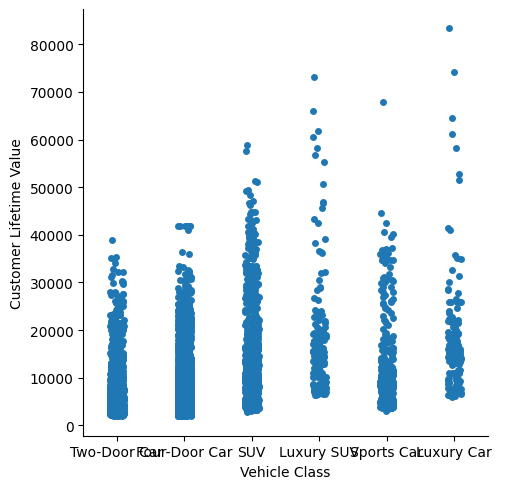

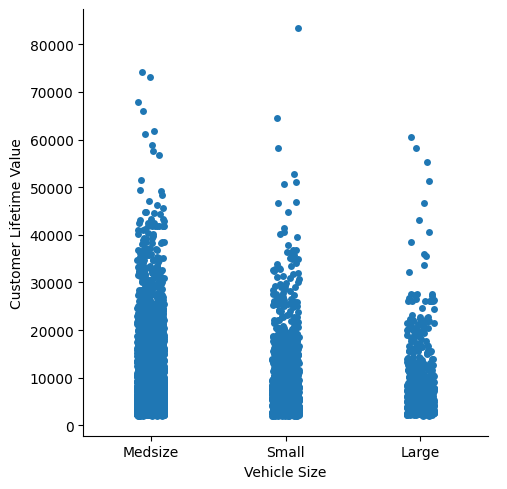

In [14]:
for col in categorical_df:
    sns.catplot(data=customer_df, x=col, y="Customer Lifetime Value")
    plt.show()

In [15]:
display(categorical_df)

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize


In [16]:
## For the categorical data, check if there is any data cleaning that need to perform. 

In [17]:
customer_df.value_counts()

State       Customer Lifetime Value  Response  Coverage  Education             Effective To Date  EmploymentStatus  Gender  Income  Location Code  Marital Status  Monthly Premium Auto  Months Since Last Claim  Months Since Policy Inception  Number of Open Complaints  Number of Policies  Policy Type     Policy        Renew Offer Type  Sales Channel  Total Claim Amount  Vehicle Class  Vehicle Size
Arizona     5757.442258              Yes       Basic     Master                1/31/11            Employed          M       88997   Rural          Divorced        72                    9                        71                             0                          3                   Personal Auto   Personal L3   Offer2            Branch         174.041566          Four-Door Car  Small           4
California  14435.673650             Yes       Premium   Master                1/26/11            Employed          M       60880   Rural          Married         119                   25          

In [18]:
categorical_df.columns

Index(['State', 'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [19]:
## Changing the 'effective_to_date' column to datetime format
customer_df['Effective To Date'] = pd.to_datetime(customer_df['Effective To Date'])   

C:\Users\rainm\AppData\Local\Temp\ipykernel_18160\1742085886.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_df['Effective To Date'] = pd.to_datetime(customer_df['Effective To Date'])


In [20]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   State                          9134 non-null   object        
 1   Customer Lifetime Value        9134 non-null   float64       
 2   Response                       9134 non-null   object        
 3   Coverage                       9134 non-null   object        
 4   Education                      9134 non-null   object        
 5   Effective To Date              9134 non-null   datetime64[ns]
 6   EmploymentStatus               9134 non-null   object        
 7   Gender                         9134 non-null   object        
 8   Income                         9134 non-null   int64         
 9   Location Code                  9134 non-null   object        
 10  Marital Status                 9134 non-null   object        
 11  Monthly Premi

In [21]:
# List of categorical variables
categorical_variables = ['State', 'Response', 'Coverage', 'Education', 'Effective To Date',
                         'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
                         'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
                         'Vehicle Class', 'Vehicle Size']

# Loop through each categorical variable and print the value counts
for col in categorical_variables:
    print(f'Value counts for {col}:')
    print(customer_df[col].value_counts())
    print('\n')

Value counts for State:
State
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64


Value counts for Response:
Response
No     7826
Yes    1308
Name: count, dtype: int64


Value counts for Coverage:
Coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64


Value counts for Education:
Education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64


Value counts for Effective To Date:
Effective To Date
2011-01-10    195
2011-01-27    194
2011-02-14    186
2011-01-26    181
2011-01-17    180
2011-01-19    179
2011-01-31    178
2011-01-03    178
2011-01-20    173
2011-02-26    169
2011-01-28    169
2011-02-19    168
2011-01-05    167
2011-02-27    167
2011-01-11    166
2011-02-04    164
2011-02-10    161
2011-02-28    161
2011-01-02    160
2011-01-21    160
2011-01-29    160
2

In [22]:
## Lab | Feature extraction
## For this lab, we will be using the dataset in the Customer Analysis Business Case.

## Instructions:
    ## Open the categoricals variable we created before
        ## categoricals = data.select_dtypes(np.object)
        ## categoricals.head()
    ## Plot all the categorical variables with the proper plot. What can you see?
    ## There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
    ## Plot time variable. Can you extract something from it?

In [23]:
numerical_df = customer_df.select_dtypes(include=['float64', 'int64'])
categorical_df = customer_df.select_dtypes(include=['object'])

In [24]:
categorical_df.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


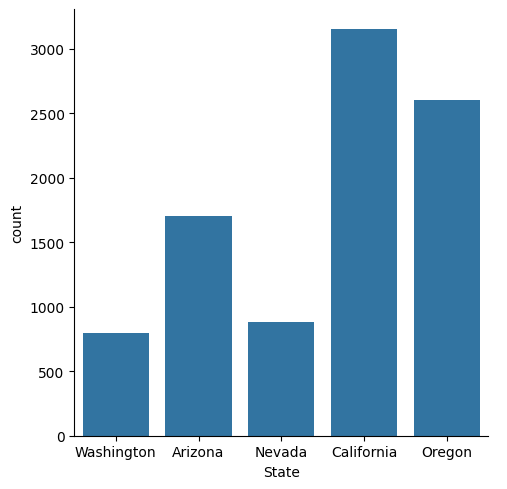

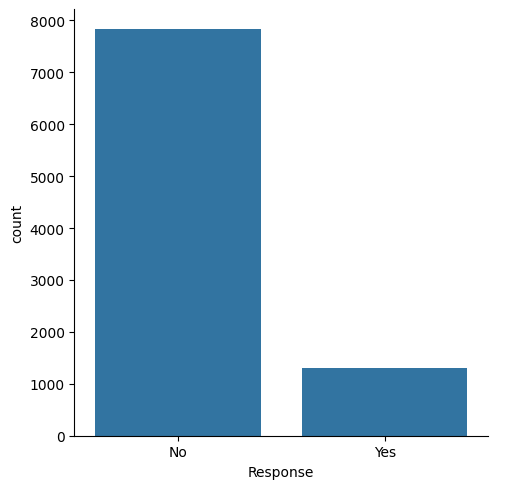

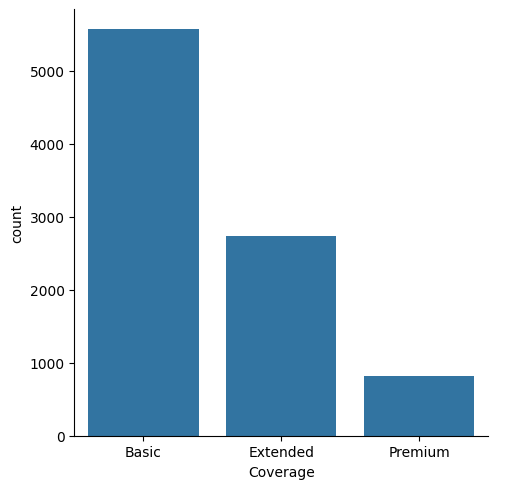

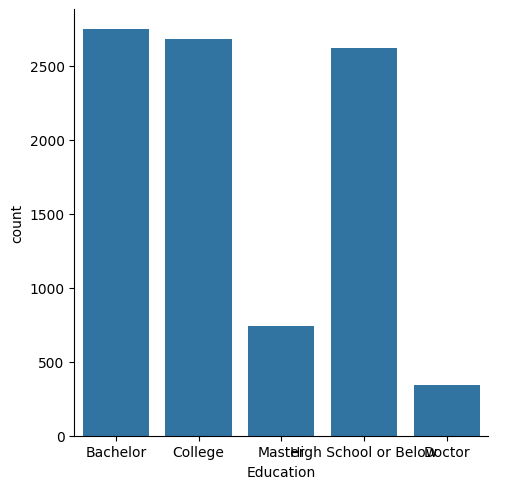

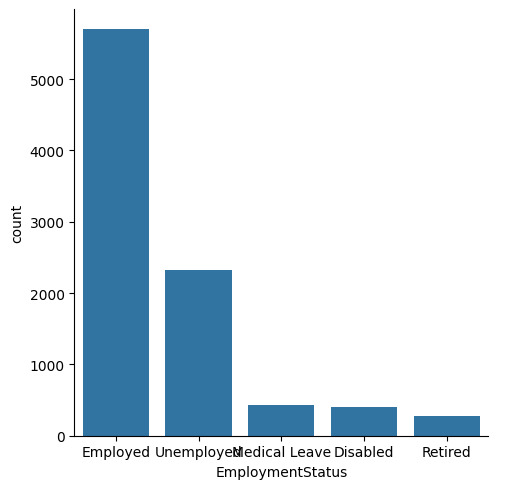

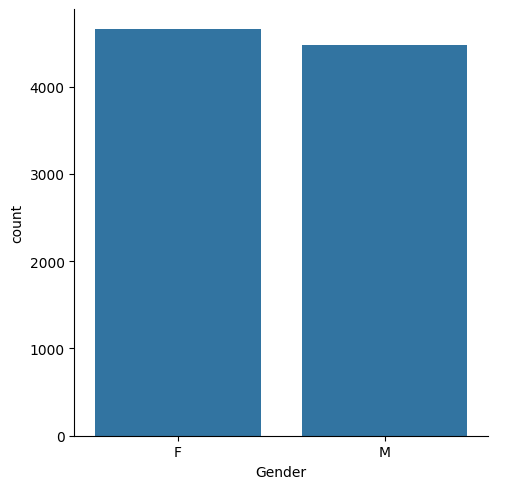

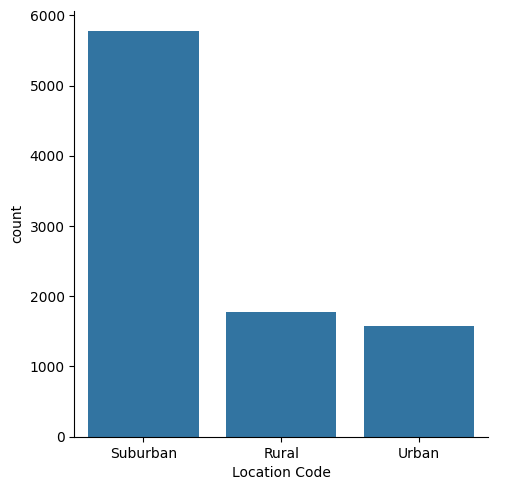

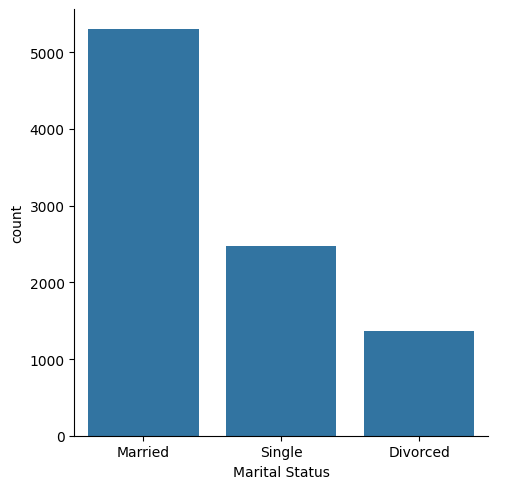

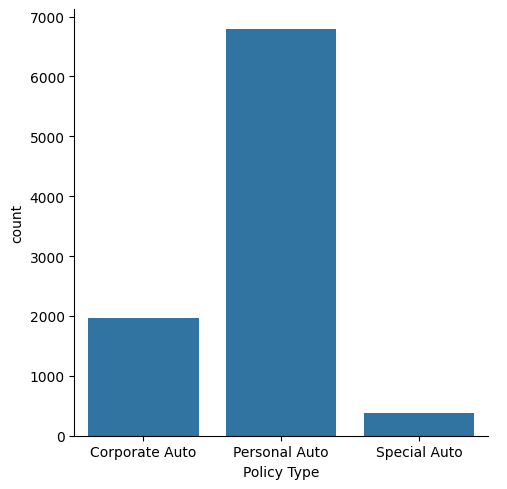

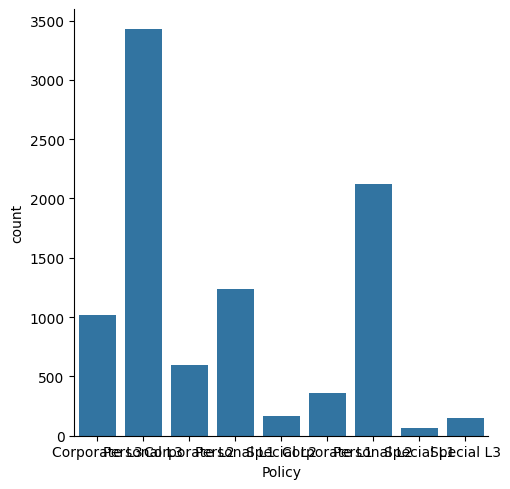

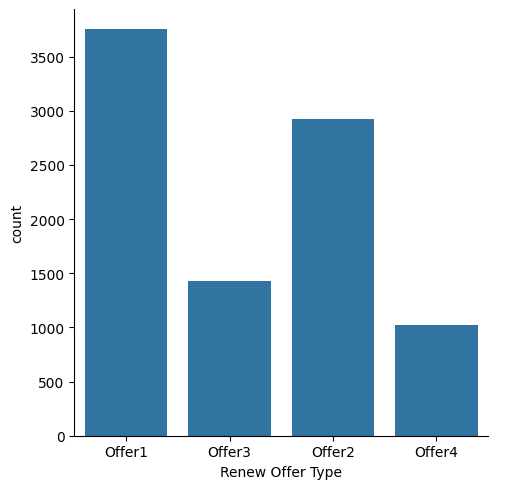

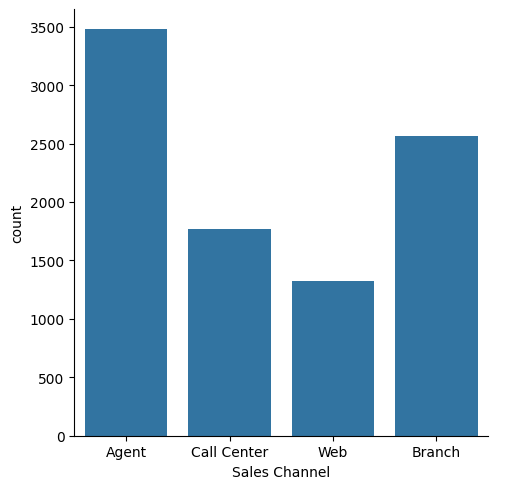

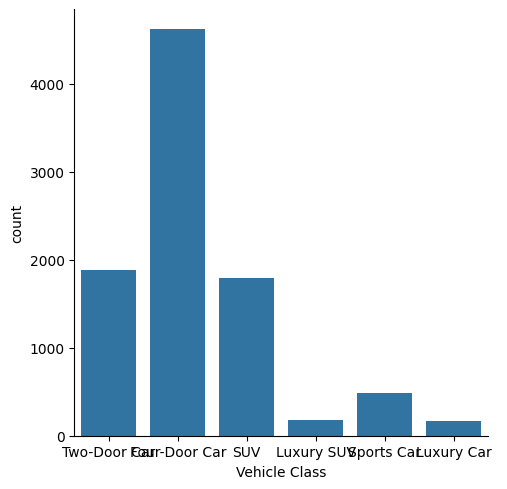

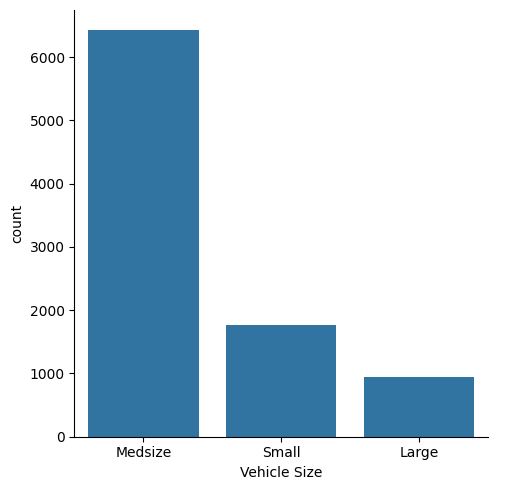

In [25]:
for col in categorical_df:
    sns.catplot(data=customer_df, x=col, kind="count")
    plt.show

In [26]:
customer_df.columns

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [27]:
## Converting 'Effective To Date' to datetime
## categoricals['Effective To Date'] = pd.to_datetime(categoricals['Effective To Date'])

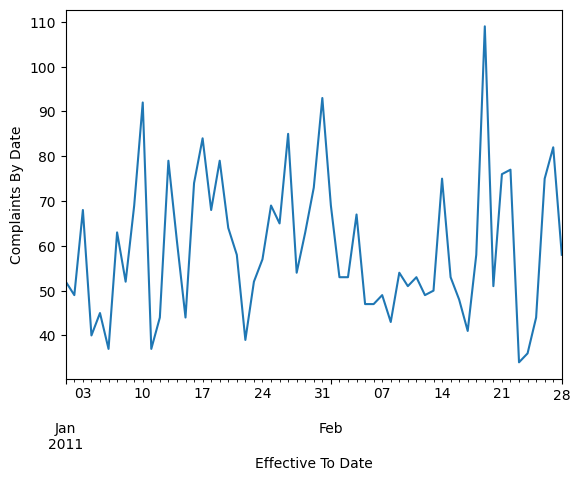

In [28]:
## Plot time variable

complaints_by_date = customer_df.groupby('Effective To Date')['Number of Open Complaints'].sum()  ## switch with the mean to see the average of open complaintzs 
plt.ylabel('Complaints By Date')
complaints_by_date.plot()
plt.show()

In [29]:
## Lab | Data cleaning and wrangling
## For this lab, we will be using the dataset in the Customer Analysis Business Case.

## Instructions
## So far we have worked on EDA. This lab will focus on data cleaning and wrangling from everything we noticed before.

    ## We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
    ## Create a copy of the dataframe for the data wrangling.
    ## Normalize the continuous variables. You can use any one method you want.
    ## Encode the categorical variables
    ## The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
    ## Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.
    ## Hint for Categorical Variables

## You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):
    # One hot to state
    # Ordinal to coverage
    # Ordinal to employmentstatus
    # Ordinal to location code
    # One hot to marital status
    # One hot to policy type
    # One hot to policy
    # One hot to renew offercustomer_df
    # One hot to sales channel
    # One hot vehicle class
    # Ordinal vehicle size

## data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
    # given that column "coverage" in the dataframe "data" has three categories:
    # "basic", "extended", and "premium" and values are to be represented in the same order.

In [50]:
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [51]:
numerical_df = customer_df.select_dtypes(include=['float64', 'int64'])
categorical_df = customer_df.select_dtypes(include=['object'])

In [52]:
numerical_df.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [53]:
categorical_df.columns

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [54]:
# Removing outliers using the Interquartile Range (IQR) method.
# The IQR method identifies outliers as data points lying beyond 1.5 times the IQR from the first (Q1) and third (Q3) quartiles. This multiplier can be adjusted if needed

def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return (df[col] >= lower_limit) & (df[col] <= upper_limit)
contintuous_cols = numerical_df.columns
mask = customer_df[contintuous_cols].apply(lambda col: remove_outliers(customer_df, col.name))
customer_df_no_outliers = customer_df[mask.all(axis=1)]

customer_df_no_outliers

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,Rural,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TF56202,California,5032.165498,No,Basic,College,2011-02-12,Employed,M,66367,Suburban,...,48,0,3,Personal Auto,Personal L3,Offer2,Call Center,307.200000,Two-Door Car,Small
YM19146,California,4100.398533,No,Premium,College,2011-01-06,Employed,F,47761,Suburban,...,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize


In [55]:
# Creating a copy of the dataframe for the data wrangling.
wrangled_df = customer_df_no_outliers.copy()

# Confirming the operation by displaying the shape of the new DataFrame
wrangled_df.shape


(5911, 23)

In [56]:
## Normalize the continuous variables. You can use any one method you want.

## Identifying continuous variables in the wrangled DataFrame
## Assuming continuous variables are those with a high number of unique values and of numerical type
continuous_vars = ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Total Claim Amount']  ## # Choosing which column index we are going to scale

# Initializing the MinMaxScaler to normalize continuous variables
scaler = MinMaxScaler()

# Applying normalization to the continuous variables in the DataFrame
wrangled_df[continuous_vars] = scaler.fit_transform(wrangled_df[continuous_vars])

# Displaying the first few rows to verify normalization
wrangled_df[continuous_vars].head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Total Claim Amount
Customer,,,,
BU79786,0.053337,0.562847,0.073394,0.400846
AI49188,0.755758,0.487763,0.431193,0.590125
WW63253,0.392086,0.000000,0.412844,0.552000
HB64268,0.056818,0.438443,0.110092,0.143821
OC83172,0.434439,0.629140,0.073394,0.165964


In [57]:
wrangled_df[continuous_vars].describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Total Claim Amount
count,5911.000000,5911.000000,5911.000000,5911.000000
mean,0.284421,0.385386,0.232724,0.402107
std,0.220313,0.304229,0.202760,0.216043
min,0.000000,0.000000,0.000000,0.000000
25%,0.106443,0.118302,0.064220,0.265845
50%,0.230635,0.349806,0.155963,0.376624
75%,0.419437,0.632340,0.394495,0.540911
max,1.000000,1.000000,1.000000,1.000000


In [58]:
### Other alternative below using StandardScaler()

## Normalize the continuous variables. You can use any one method you want.

wrangled_df_2 = customer_df_no_outliers.copy()

## Identifying continuous variables in the wrangled DataFrame
## Assuming continuous variables are those with a high number of unique values and of numerical type
continuous_vars_2 = ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Total Claim Amount']

# Initializing the MinMaxScaler to normalize continuous variables
scaler_2 = StandardScaler()

# Applying normalization to the continuous variables in the DataFrame
wrangled_df_2[continuous_vars_2] = scaler_2.fit_transform(wrangled_df_2[continuous_vars_2])

# Displaying the first few rows to verify normalization
wrangled_df_2[continuous_vars_2].head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Total Claim Amount
Customer,,,,
BU79786,-1.048979,0.583364,-0.785870,-0.005838
AI49188,2.139579,0.336541,0.978915,0.870355
WW63253,0.488730,-1.266871,0.888413,0.693868
HB64268,-1.033177,0.174414,-0.604866,-1.195633
OC83172,0.680989,0.801286,-0.785870,-1.093129


In [59]:
wrangled_df_2[continuous_vars].describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Total Claim Amount
count,5.911000e+03,5.911000e+03,5.911000e+03,5.911000e+03
mean,6.791687e-17,7.152308e-17,-2.100615e-16,1.334296e-16
std,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00
min,-1.291098e+00,-1.266871e+00,-1.147877e+00,-1.861392e+00
25%,-8.079110e-01,-8.779779e-01,-8.311206e-01,-6.307720e-01
50%,-2.441552e-01,-1.169597e-01,-3.786117e-01,-1.179642e-01
75%,6.128886e-01,8.118073e-01,7.979116e-01,6.425380e-01
max,3.248288e+00,2.020408e+00,3.784471e+00,2.767704e+00


In [60]:
## Encode the categorical variables.

## Identifying categorical variables (excluding 'Customer' as it's a unique identifier)
categorical_vars = wrangled_df.select_dtypes(include=['object']).columns.tolist()

## Initializing the OneHotEncoder
encoder = OneHotEncoder(drop='first')

## Applying OneHotEncoding to the categorical variables
encoded_vars = encoder.fit_transform(wrangled_df[categorical_vars]).toarray()

## Creating a DataFrame for the encoded variables, ensuring we convert the sparse matrix to a dense array with .toarray()
encoded_df = pd.DataFrame(encoded_vars, columns=encoder.get_feature_names_out(categorical_vars))

## Resetting index on wrangled_df to ensure a correct join (in case rows were removed during outlier cleaning)
wrangled_df.reset_index(drop=True, inplace=True)

## Combining the encoded categorical variables with the rest of the wrangled DataFrame
wrangled_df_encoded = pd.concat([wrangled_df.drop(categorical_vars, axis=1), encoded_df], axis=1)

# Display the shape of the DataFrame to confirm the encoding process
wrangled_df_encoded.shape

(5911, 50)

In [61]:
wrangled_df[categorical_vars].head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
2,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
3,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
4,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize


In [62]:
# Transforming the 'Effective To Date' time variable into more useful features, 
# by extracting the day of the week and the month as integers.

# First, ensure 'Effective To Date' is in datetime format if not already
wrangled_df['Effective To Date'] = pd.to_datetime(wrangled_df['Effective To Date'])

# Extracting day of the week and month from 'Effective To Date'
wrangled_df['Effective To Month'] = wrangled_df['Effective To Date'].dt.month
wrangled_df['Effective To Weekday'] = wrangled_df['Effective To Date'].dt.dayofweek   ## Effective To Weekday: Indicates the day of the week (with Monday=0, Sunday=6).
wrangled_df['Effective To day'] = wrangled_df['Effective To Date'].dt.day

# Display the first few rows to verify the transformation
wrangled_df[['Effective To Date', 'Effective To Month','Effective To day', 'Effective To Weekday']].head()

,Effective To Date,Effective To Month,Effective To day,Effective To Weekday
0,2011-02-24,2,24,3
1,2011-02-19,2,19,5
2,2011-01-20,1,20,3
3,2011-02-03,2,3,3
4,2011-01-25,1,25,1


In [63]:
# Checking the data types of all columns in the wrangled_df to ensure they are numerical
# If any non-numerical columns are found, we will apply encoding to convert them to numerical format

# Display data types of all columns
column_data_types = wrangled_df.dtypes

# Identify any non-numerical columns
non_numerical_columns = column_data_types[column_data_types != 'int64'][column_data_types != 'float64'].index.tolist()

# Check for any non-numerical columns that might have been missed
non_numerical_columns

['State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Effective To Month',
 'Effective To Weekday',
 'Effective To day']

In [64]:
# Check for any non-numerical columns that might have been missed
wrangled_df[non_numerical_columns]

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Effective To Month,Effective To Weekday,Effective To day
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2,3,24
1,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2,5,19
2,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,1,3,20
3,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2,3,3
4,Oregon,Yes,Basic,Bachelor,2011-01-25,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize,1,1,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5906,California,No,Basic,College,2011-02-12,Employed,M,Suburban,Divorced,Personal Auto,Personal L3,Offer2,Call Center,Two-Door Car,Small,2,5,12
5907,California,No,Premium,College,2011-01-06,Employed,F,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Large,1,3,6
5908,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,2,5,12
5909,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,2,3,3


In [65]:
## Encoding Categorical Variables for Machine Learning Purposes

# Applying ordinal encoding to 'Coverage'
wrangled_df['Coverage'] = wrangled_df['Coverage'].map({"Basic": 0, "Extended": 1, "Premium": 2})

# Applying ordinal encoding to 'EmploymentStatus' with an assumed order (not explicitly provided)
employment_status_order = {'Unemployed': 0, 'Medical Leave': 1, 'Disabled': 2, 'Retired': 3, 'Employed': 4}
wrangled_df['EmploymentStatus'] = wrangled_df['EmploymentStatus'].map(employment_status_order)

# Applying ordinal encoding to 'Location Code'
location_code_order = {'Rural': 0, 'Suburban': 1, 'Urban': 2}
wrangled_df['Location Code'] = wrangled_df['Location Code'].map(location_code_order)

# Applying ordinal encoding to 'Vehicle Size'
vehicle_size_order = {'Small': 0, 'Medsize': 1, 'Large': 2}
wrangled_df['Vehicle Size'] = wrangled_df['Vehicle Size'].map(vehicle_size_order)

# Using pandas get_dummies for each specified variable to drop the first category to avoid multicollinearity
one_hot_cols = ['State', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class']
wrangled_df = pd.get_dummies(wrangled_df, columns=one_hot_cols, drop_first=True)



In [66]:
# Checking the DataFrame's first few rows to ensure the transformations were applied
wrangled_df.head()

,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Monthly Premium Auto,...,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car
0,0.053337,No,0,Bachelor,2011-02-24,4,F,0.562847,1,0.073394,...,False,False,False,False,False,False,False,False,False,True
1,0.755758,No,2,Bachelor,2011-02-19,4,F,0.487763,1,0.431193,...,False,False,False,False,False,False,False,False,False,True
2,0.392086,No,0,Bachelor,2011-01-20,0,M,0.000000,1,0.412844,...,False,False,False,False,False,True,False,True,False,False
3,0.056818,No,0,Bachelor,2011-02-03,4,M,0.438443,0,0.110092,...,False,False,False,False,False,False,False,False,False,False
4,0.434439,Yes,0,Bachelor,2011-01-25,4,F,0.629140,0,0.073394,...,False,True,False,False,False,False,True,False,False,True


In [67]:
wrangled_df.shape

(5911, 44)

In [68]:
## Lab | Comparing regression models
## For this lab, we will be using the dataset in the Customer Analysis Business Case.

## Instructions
    ## In this final lab, we will model our data. Import sklearn train_test_split and separate the data.
    ## Try a simple linear regression with all the data to see whether we are getting good results.
    ## Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
    ## Use the function to check LinearRegressor and KNeighborsRegressor.
    ## You can check also the MLPRegressor for this task!
    ## Check and discuss the results.

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X = wrangled_df.drop(['Total Claim Amount'], axis=1)  ## explanatory variables
y = wrangled_df['Total Claim Amount']   ## target variable

# Dropping non-numeric columns for this example, except for encoded boolean columns which are effectively numeric
numeric_cols = X.select_dtypes(include=['int64', 'float64', 'bool']).columns
X_numeric = X[numeric_cols]

# Splitting the dataset into training and testing sets using only numeric features for simplicity
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Verifying the split
split_info_corrected = {
    "X_train_shape": X_train.shape,
    "X_test_shape": X_test.shape,
    "y_train_shape": y_train.shape,
    "y_test_shape": y_test.shape
}

split_info_corrected

{'X_train_shape': (4728, 36),
 'X_test_shape': (1183, 36),
 'y_train_shape': (4728,),
 'y_test_shape': (1183,)}

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the linear regression model
model = LinearRegression()

# Fit the model with the training data
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate the model performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

performance_metrics = {
    "MSE": mse,             ## Mean Squared Error 
    "RMSE": rmse,           ## Root Mean Squared Erro
    "R^2": r2               ## R^2 Score
}

performance_metrics

{'MSE': 0.02173047757013688,
 'RMSE': 0.14741260994276195,
 'R^2': 0.5172633657035309}

In [74]:
from sklearn.metrics import mean_absolute_error

# Defining a function to train and evaluate multiple models
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        # Predict on the test set
        y_pred = model.predict(X_test)
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = mse ** 0.5
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        # Store results
        results[name] = {
            "MSE": mse,
            "RMSE": rmse,
            "MAE": mae,         ## Mean Absolute Error
            "R^2": r2
        }
    return results

In [75]:
## Checking other models and comparing their results with the what we got from linear regression above

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

# List of models to train and evaluate
models_to_test = {
    "Linear Regression": LinearRegression(),
    "KNeighbors": KNeighborsRegressor(),
    "MLPRegressor": MLPRegressor(random_state=42, max_iter=500),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Calling the function with the models list
model_results = train_and_evaluate(models_to_test, X_train, X_test, y_train, y_test)
model_results

c:\Users\rainm\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\rainm\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


{'Linear Regression': {'MSE': 0.02173047757013688,
  'RMSE': 0.14741260994276195,
  'MAE': 0.116467664349994,
  'R^2': 0.5172633657035309},
 'KNeighbors': {'MSE': 0.03638797374138374,
  'RMSE': 0.19075632031831538,
  'MAE': 0.14409874203542739,
  'R^2': 0.19165108469941305},
 'MLPRegressor': {'MSE': 0.01081536757180791,
  'RMSE': 0.10399695943539844,
  'MAE': 0.07554459828221609,
  'R^2': 0.7597395582567108},
 'Random Forest': {'MSE': 0.007938232281881773,
  'RMSE': 0.08909675797626855,
  'MAE': 0.06287743669087625,
  'R^2': 0.8236543342569969}}

In [ ]:
## According to the metrics of the regressions above, we see that the Random Forest was the best predictor model noting the lowest MSE, RMSE, MAE, and hightest R^2.
## R^2 value of 82.3% of the Random Forest indicates that this model is capable of explaining approximately 82.3% of the variance in the target variable.

## https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e#:~:text=The%20lower%20value%20of%20MAE,variability%20in%20the%20dependent%20variable.
    ## The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model. However, a higher value of R square is considered desirable.
    ## R Squared & Adjusted R Squared are used for explaining how well the independent variables in the linear regression model explains the variability in the dependent variable. R Squared value always increases with the addition of the independent variables which might lead to the addition of the redundant variables in our model. However, the adjusted R-squared solves this problem.
    ## Adjusted R squared takes into account the number of predictor variables, and it is used to determine the number of independent variables in our model. The value of Adjusted R squared decreases if the increase in the R square by the additional variable isn’t significant enough.